# Visualizing and analysing the dataset

## Loading train data

In [5]:
import os
import glob

In [13]:
def load_data(data_path):
    files = sorted(os.listdir(data_path))
    data = []
    for recording in files:
        path = os.path.join(data_path, recording)
        label = recording.split('-')[0]
        data.append((path, label))
    return data

In [16]:
DATA_DIR = "data"
data = load_data(DATA_DIR)

## Reading and visualizing the audio file

In [17]:
!pip install librosa
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
TEST_SPEAKER = utterance_dictionary[0]
print(TEST_SPEAKER)

('data/spk_10-10_21_0_0_d2_ch5.wav', 'spk_10')


In [20]:
# Read data
x, sr = librosa.load(TEST_SPEAKER[0], sr=None)

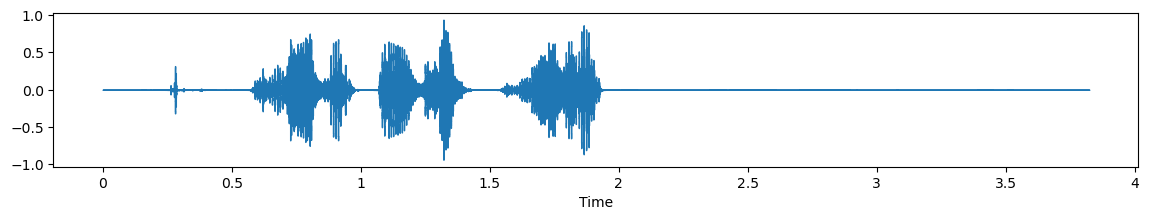

In [21]:
# Plot waveform
plt.figure(figsize=(14, 2))
librosa.display.waveshow(x, sr=sr)

In [27]:
# Samples in the audio file
print("Time steps: ", len(x))

# Sampling rate
print("Sampling rate: ", sr)

# Length of recording
print("Length of recording ", len(x)/sr, " seconds")

Time steps:  61176
Sampling rate:  16000
Length of recording  3.8235  seconds


## Calculate and visualize spectral features

### Short Time Fourier Transform

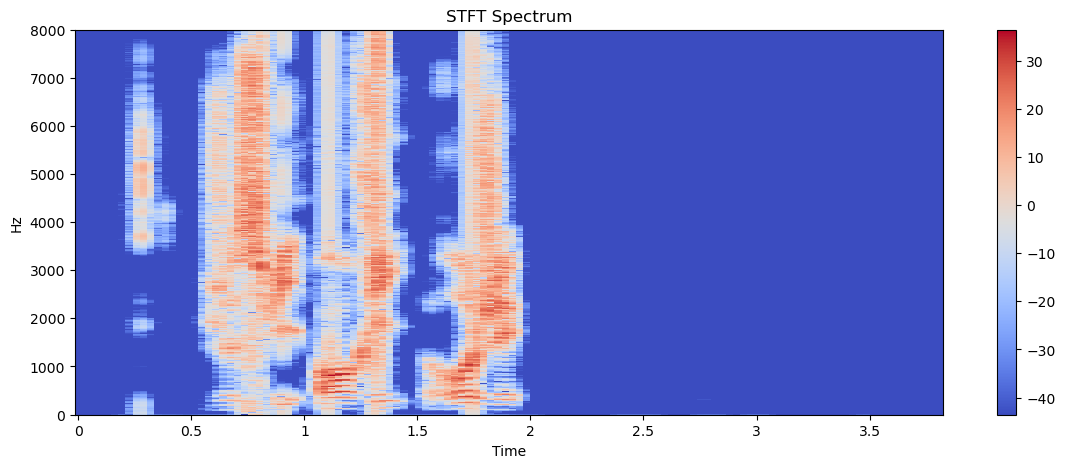

In [23]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, cmap='coolwarm', x_axis='time', y_axis='hz')
#If to pring log of frequencies
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.title("STFT Spectrum")
plt.colorbar();

### Mel Frequency Cepstral Coefficients

(50, 120)


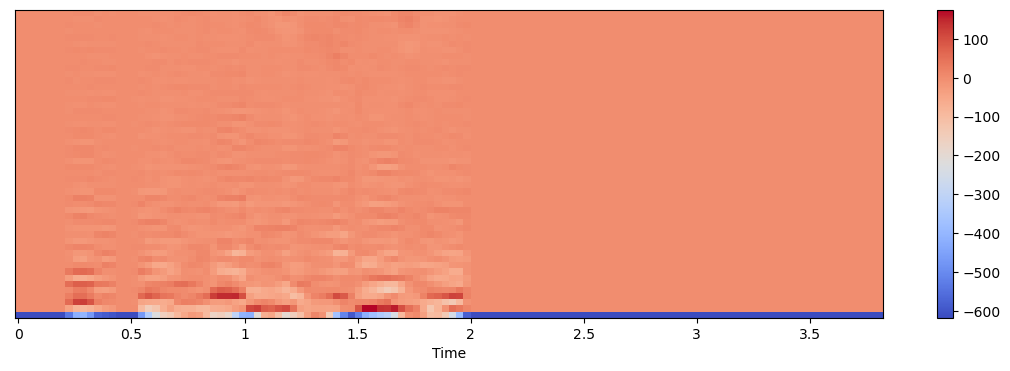

In [24]:
mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=50)
print(mfccs.shape)
plt.figure(figsize=(14, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar();

### Get the maximum waveform length in the dataset (train)

In [29]:
maxLength = 0

for i in range(len(data)):
    x, sr = librosa.load(data[i][0], sr=None)
    length = len(x)
    
    if length > maxLength:
        maxLength = length

print("Maximum length in train folder: ", maxLength)
print("Maximum duration in train folder: ", maxLength // 16000, " seconds")

Maximum length in train folder:  310375
Maximum duration in train folder:  19  seconds


### Get the maximum waveform length in the dataset (test)

In [36]:
TEST_DIR = "test"

def load_test_data(data_path):
    files = sorted(os.listdir(data_path))
    data = []
    for recording in files:
        path = os.path.join(data_path, recording)
        data.append(path)
    return data

In [39]:
test = load_test_data(TEST_DIR)

test[0]

'test/0000f88619.wav'

In [41]:
maxLength = 0

for i in range(len(test)):
    x, sr = librosa.load(test[i], sr=None)
    length = len(x)
    
    if length > maxLength:
        maxLength = length

print("Maximum length in test folder: ", maxLength)
print("Maximum duration in test folder: ", maxLength // 16000, " seconds")

Maximum length in test folder:  1558473
Maximum duration in test folder:  97  seconds
